<a href="https://colab.research.google.com/github/prabhathkumar1729/CC-Fraud-Detection/blob/main/CCFrauddetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <h1><b><center>Fraud Detection</b></h1>

<h2>Abstract</h2><br>
<p>Credit card fraud, act committed by any person who, with intent to defraud, uses a credit card that has been revoked, cancelled, reported lost, or stolen to obtain anything of value. Using the credit card number without possession of the actual card is also a form of credit card fraud. Stealing a person’s identity in order to receive a credit card is another more threatening form of credit card fraud, because it works in conjunction with identity theft. Credit card fraud is a problem that affects the entire consumer credit industry. It is one of the fastest-growing types of fraud and one of the most difficult to prevent.</p>
<p>Credit Card Fraud can be detected with Machine Learning. It is a process of data investigation and the development of a model that will provide the best results in revealing and preventing fraudulent transactions. This is achieved through bringing together all meaningful features of card users’ transactions, such as Date, User Zone, Product Category, Amount, Provider, Client’s Behavioral Patterns, etc. The information is then run through a subtly trained model that finds patterns and rules so that it can classify whether a transaction is fraudulent or is legitimate.</p>




<h2>About Project</h2>
<p>In this project I have compared different classification algorithms like Logistic Regression, Decision Tree, Random Forest, XGBoost, KNN, Naive Bayes on imbalanced data and balanced data by Oversampling and Undersampling methods to classify the transaction fraud(1) or not fraud(0). </p>

<h3><b>Dataset:</b></h3>

[<button>dataset</button>](https://www.kaggle.com/kartik2112/fraud-detection)


# Importing Data


Importing dataset from kaggle https://www.kaggle.com/kartik2112/fraud-detection into drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d kartik2112/fraud-detection

In [ ]:
!unzip \*.zip  && rm *.zip

# What our Dataset contains?


Importing necessary libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

pd.options.display.max_columns = 100
pd.options.display.max_rows = 900
pd.set_option('float_format', '{:f}'.format)

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

Loading Dataset

In [ ]:
df1 = pd.read_csv("fraudTrain.csv")
df1 = df1.drop(df1.columns[0], axis=1)

df2 = pd.read_csv("fraudTest.csv")
df2 = df2.drop(df2.columns[0], axis=1)

df = pd.concat([df1,df2])
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


Inspecting Data


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int6

In [ ]:
df.isnull().sum() #checking if there are null values in data

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
df.nunique() #checking unique values in data

trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

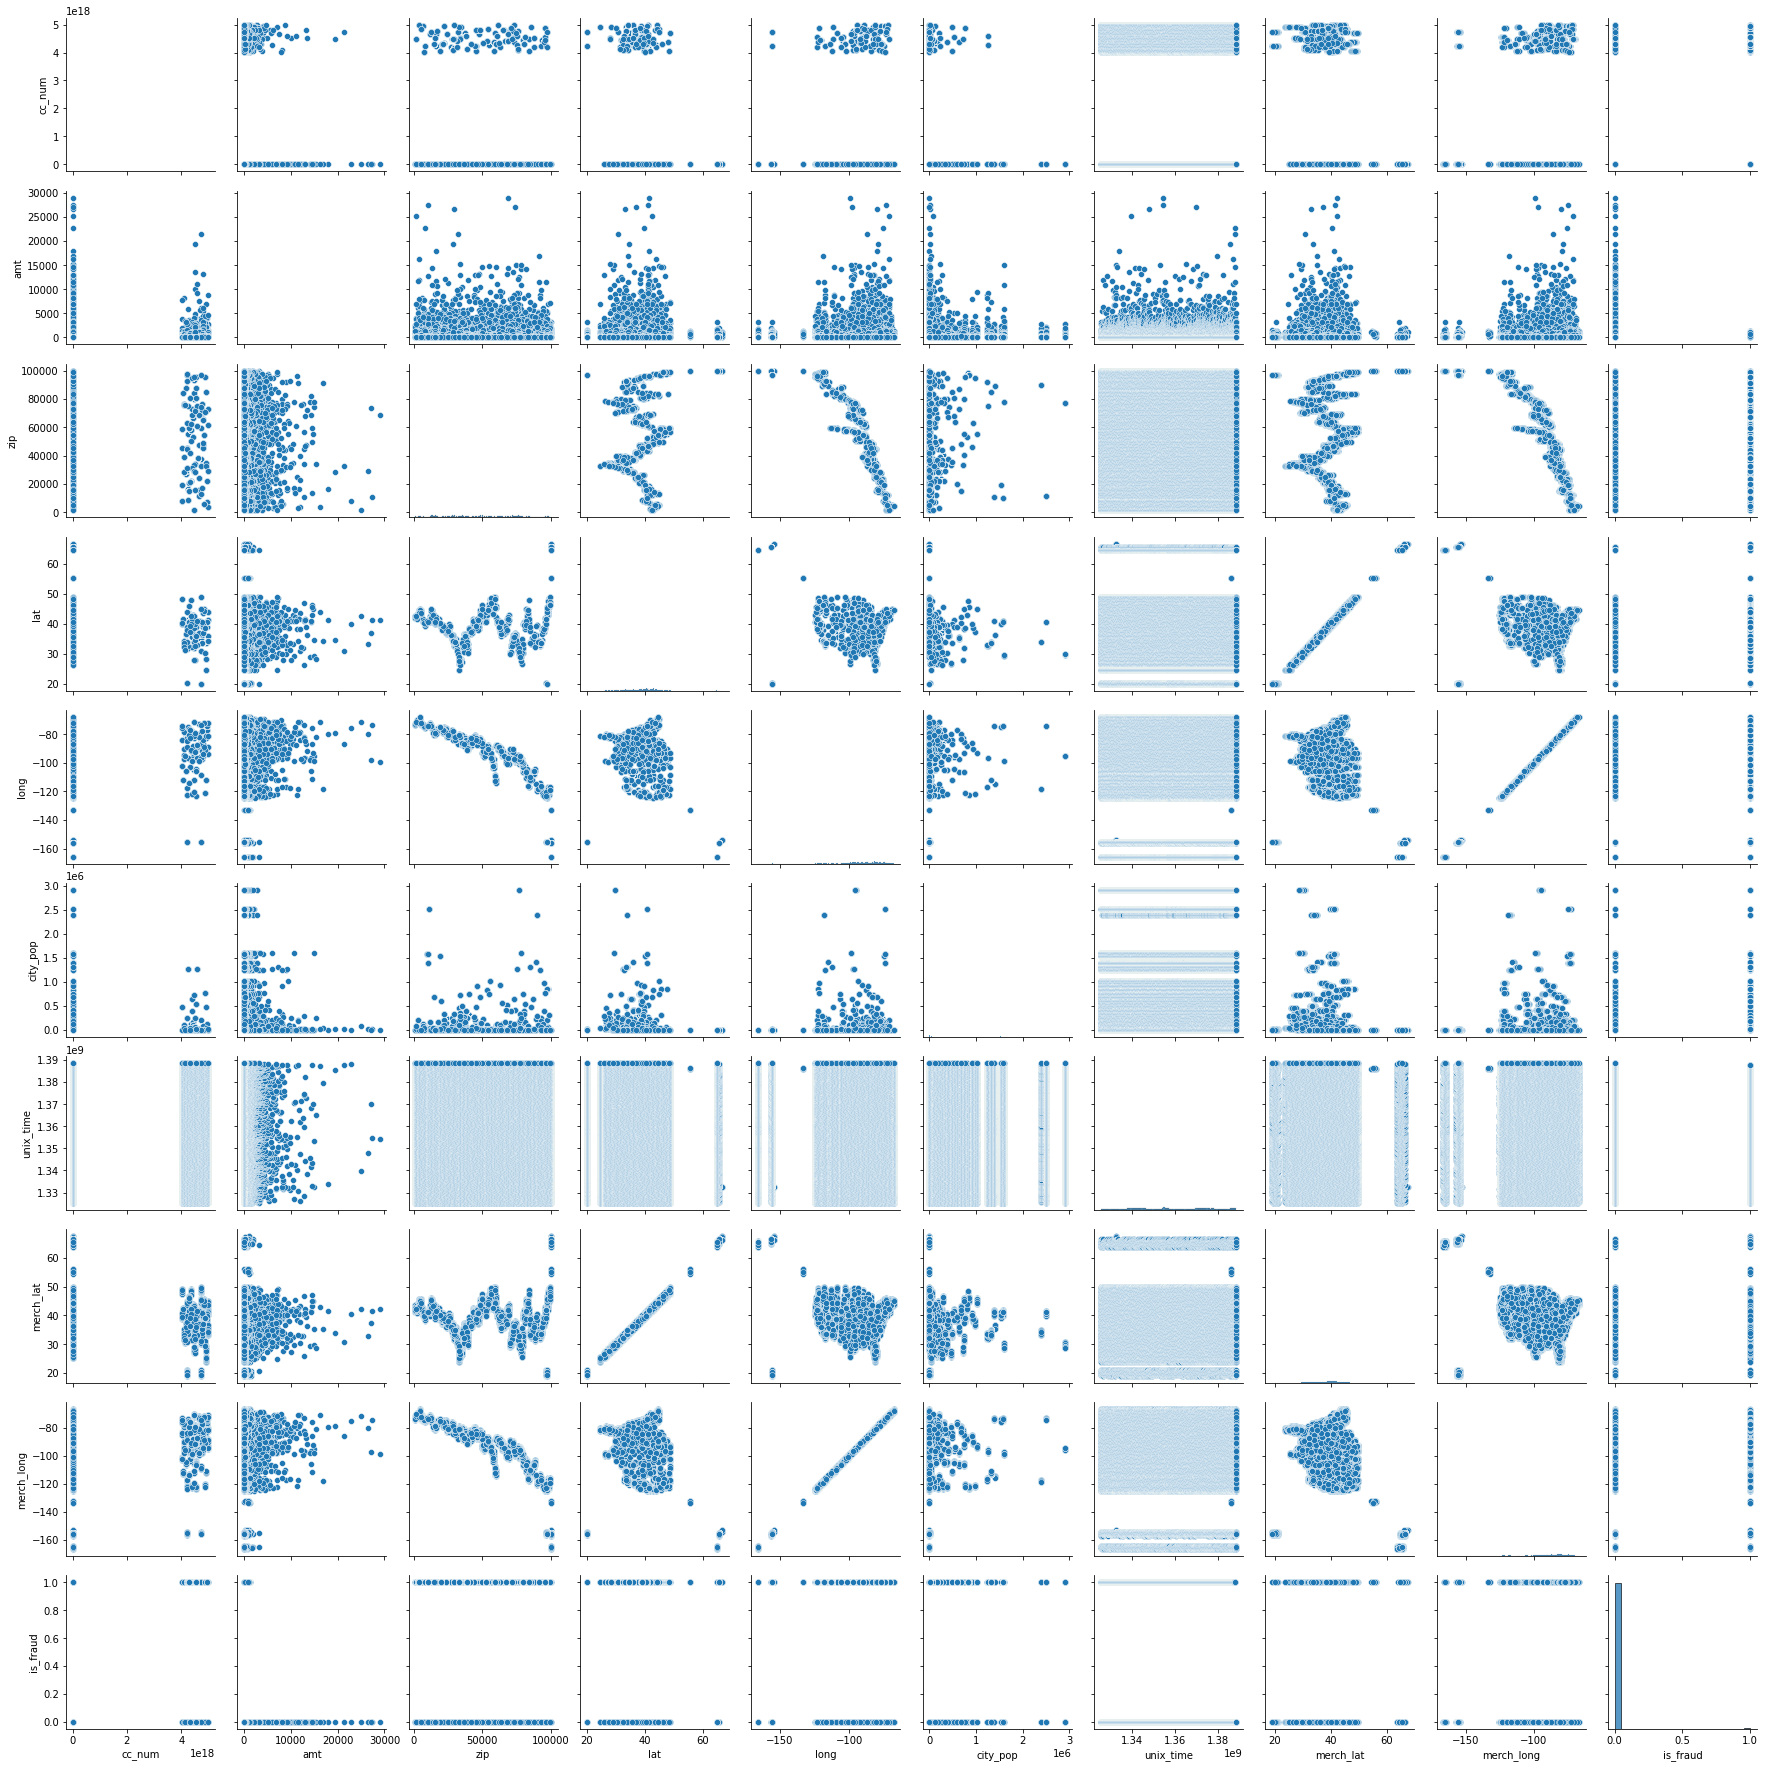

In [ ]:
sns.pairplot(df)

In [ ]:
def gender_binarizer(x):   
    if x=='F':
        return 1
    if x=='M':
        return 0
    
df['gender'] = df['gender'].transform(gender_binarizer)


In [ ]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()
df['year_month'] = df['trans_date_trans_time'].dt.to_period('M')
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = np.round((df['trans_date_trans_time'] - df['dob'])/np.timedelta64(1,'Y'))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 26 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 int64         
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time              

In [ ]:
print('M(0) vs F(1):')
print(df['gender'].value_counts())
print("-------------------------------------------------------")
print('Hour:')
print(df['trans_hour'].value_counts())
print("-------------------------------------------------------")
print('Day:')
print(df['day_of_week'].value_counts())
print("-------------------------------------------------------")
print('Month:')
print(df['year_month'].value_counts())
print("-------------------------------------------------------")
print('Category:')
print(df['category'].value_counts())
print("-------------------------------------------------------")
print('Fraud Vs Non-fraud:')
print(df['is_fraud'].value_counts())
print("-------------------------------------------------------")
print('state:')
print(df['state'].value_counts())

M(0) vs F(1):
1    1014749
0     837645
Name: gender, dtype: int64
-------------------------------------------------------
Hour:
23    95902
22    95370
16    94289
18    94052
21    93738
17    93514
13    93492
15    93439
19    93433
12    93294
14    93089
20    93081
1     61330
3     60968
2     60796
0     60655
8     60498
6     60406
10    60320
7     60301
9     60231
11    60170
5     60088
4     59938
Name: trans_hour, dtype: int64
-------------------------------------------------------
Day:
Monday       369418
Sunday       343677
Tuesday      270340
Saturday     263227
Friday       215078
Thursday     206741
Wednesday    183913
Name: day_of_week, dtype: int64
-------------------------------------------------------
Month:
2019-12    141060
2020-12    139538
2020-08     88759
2020-06     87805
2019-08     87359
2019-07     86596
2019-06     86064
2020-07     85848
2020-05     74343
2020-03     72850
2020-11     72635
2019-05     72532
2019-03     70939
2019-09     70652
2019

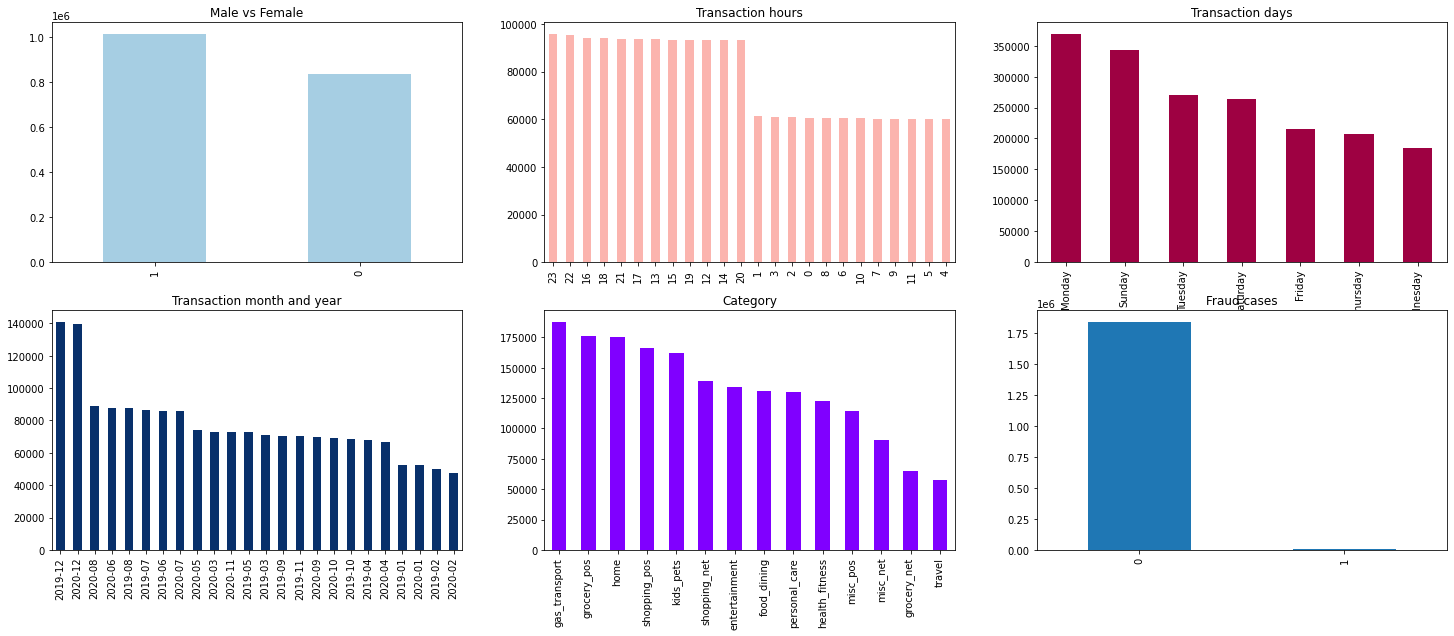

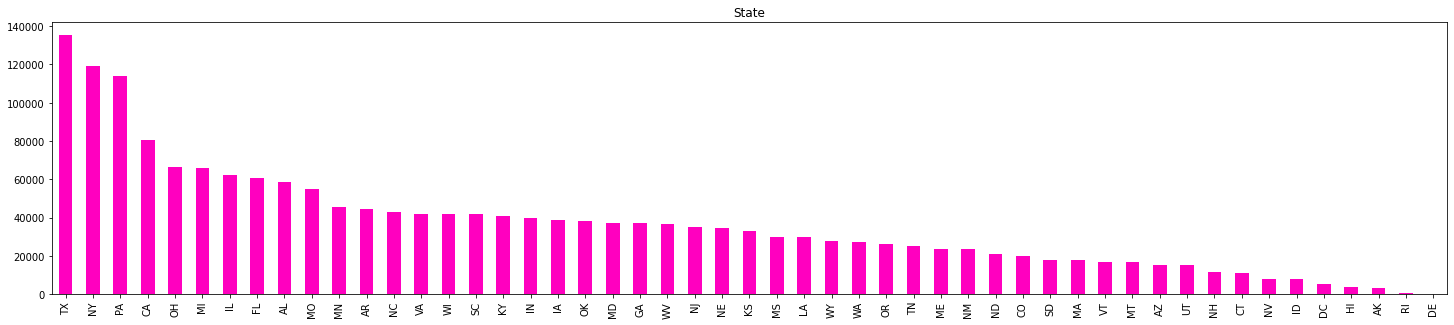

In [ ]:

plt.figure(figsize=(25,15))
plt.subplot(3,3,1)
df['gender'].value_counts().plot.bar(colormap='Paired').set_title('Male vs Female');
plt.subplot(3,3,2)
df['trans_hour'].value_counts().plot.bar(colormap='Pastel1').set_title('Transaction hours');
plt.subplot(3,3,3)
df['day_of_week'].value_counts().plot.bar(colormap='Spectral').set_title('Transaction days');
plt.subplot(3,3,4)
df['year_month'].value_counts().plot.bar(colormap='Blues_r').set_title('Transaction month and year');
plt.subplot(3,3,5)
df['category'].value_counts().plot.bar(colormap='rainbow').set_title('Category');
plt.subplot(3,3,6)
df['is_fraud'].value_counts().plot.bar().set_title('Fraud cases');
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
df['state'].value_counts().plot.bar(colormap='gist_rainbow_r').set_title('State');

In [ ]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,1,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.000000
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,1,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.000000
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,0,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.000000
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,0,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.000000
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,0,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.000000


In [ ]:
category_onehot = pd.get_dummies(df.category, drop_first=False)
df = pd.concat([df, category_onehot],axis=1)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,1,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,1,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,0,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,0,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,0,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
day_of_week_onehot = pd.get_dummies(df.day_of_week,drop_first=False)
df = pd.concat([df, day_of_week_onehot],axis=1)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,1,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,1,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,0,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,0,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,0,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.index = pd.to_datetime(df['trans_date_trans_time'])
df = df.rename_axis(index={'trans_date_trans_time': 'time_index'})
df = df.sort_index()
df_hist_orders_2h = df.groupby(['cc_num'])['is_fraud'].rolling('2H00S').count().shift().reset_index().fillna(0)
df_hist_orders_2h.columns = ['cc_num','trans_date_trans_time','hist_trans_2h']
df_hist_orders_2h = df_hist_orders_2h.astype({'hist_trans_2h': 'int'})
df_hist_fraud_trans_2h = df[df['is_fraud']== 1].groupby(['cc_num'])['is_fraud'].rolling('2H00S').count().shift().reset_index().fillna(0)
df_hist_fraud_trans_2h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_2h']
df_hist_fraud_trans_2h = df_hist_fraud_trans_2h.astype({'hist_fraud_trans_2h': 'int'})

In [ ]:
df_hist_orders_24h = df.groupby(['cc_num'])['is_fraud'].rolling('24H').count().shift().reset_index().fillna(0)
df_hist_orders_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_24h']
df_hist_orders_24h = df_hist_orders_24h.astype({'hist_trans_24h': 'int'})
df_hist_fraud_trans_24h = df[df['is_fraud']== 1].groupby(['cc_num'])['is_fraud'].rolling('24H').count().shift().reset_index().fillna(0)
df_hist_fraud_trans_24h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_24h']
df_hist_fraud_trans_24h = df_hist_fraud_trans_24h.astype({'hist_fraud_trans_24h': 'int'})

In [ ]:
df['trans_date'] = df['trans_date_trans_time'].dt.date
df = df.merge(df_hist_orders_24h,left_on = ['cc_num','trans_date_trans_time'],right_on = ['cc_num','trans_date_trans_time'],how = 'left').fillna(0)
df = df.merge(df_hist_fraud_trans_24h,left_on = ['cc_num','trans_date_trans_time'],right_on = ['cc_num','trans_date_trans_time'],how = 'left').fillna(0)
df = df.merge(df_hist_orders_2h,left_on = ['cc_num','trans_date_trans_time'],right_on = ['cc_num','trans_date_trans_time'],how = 'left').fillna(0)
df = df.merge(df_hist_fraud_trans_2h,left_on = ['cc_num','trans_date_trans_time'],right_on = ['cc_num','trans_date_trans_time'],how = 'left').fillna(0)
df = df.astype({'hist_fraud_trans_24h': 'int','hist_fraud_trans_2h': 'int'})
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,trans_date,hist_trans_24h,hist_fraud_trans_24h,hist_trans_2h,hist_fraud_trans_2h
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,1,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2019-01-01,6,0,2,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,1,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2019-01-01,1,0,1,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,0,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2019-01-01,5,0,1,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,0,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2019-01-01,5,0,1,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,0,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,2019-01-01,6,0,1,0


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852658 entries, 0 to 1852657
Data columns (total 52 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 int64         
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time             

# Training and testing on imbalanced data

<p>An imbalanced dataset means instances of one of the two classes is higher than the other, in another way, the number of observations is not the same for all the classes in a classification dataset. Here we have very large number of non-fraud(0) observations compared to fraud(1) observations. </p>

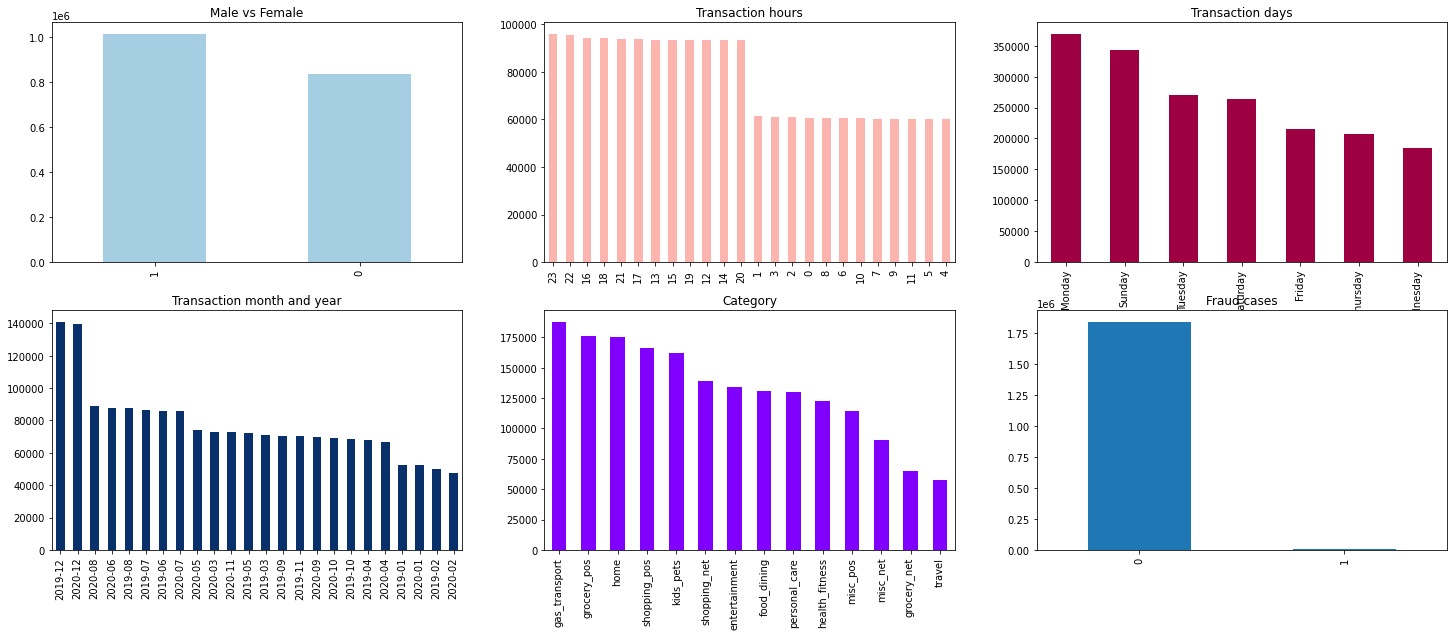

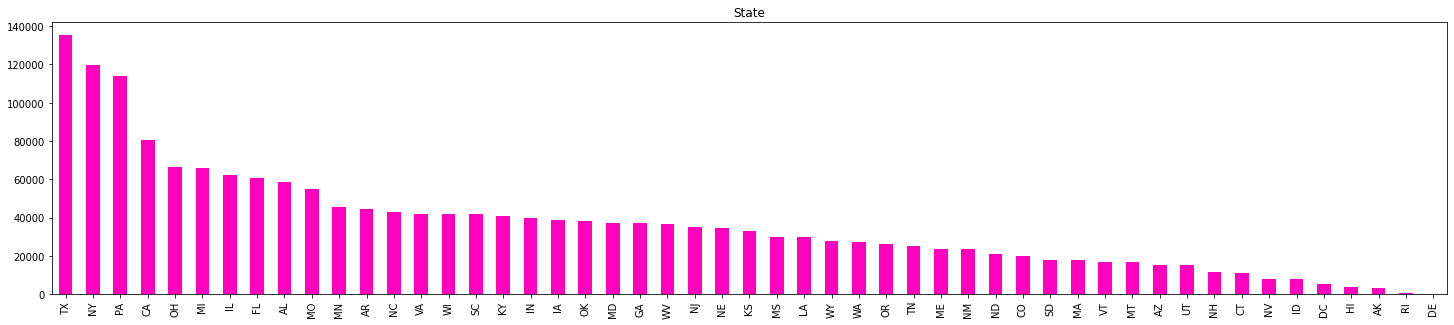

In [ ]:
plt.figure(figsize=(25,15))
plt.subplot(3,3,1)
df['gender'].value_counts().plot.bar(colormap='Paired').set_title('Male vs Female');
plt.subplot(3,3,2)
df['trans_hour'].value_counts().plot.bar(colormap='Pastel1').set_title('Transaction hours');
plt.subplot(3,3,3)
df['day_of_week'].value_counts().plot.bar(colormap='Spectral').set_title('Transaction days');
plt.subplot(3,3,4)
df['year_month'].value_counts().plot.bar(colormap='Blues_r').set_title('Transaction month and year');
plt.subplot(3,3,5)
df['category'].value_counts().plot.bar(colormap='rainbow').set_title('Category');
plt.subplot(3,3,6)
df['is_fraud'].value_counts().plot.bar().set_title('Fraud cases');
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
df['state'].value_counts().plot.bar(colormap='gist_rainbow_r').set_title('State');

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_cols = ['cc_num', 'amt', 'gender', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'trans_hour', 'age', 'entertainment', 'food_dining', 'gas_transport',
          'grocery_net', 'grocery_pos', 'health_fitness', 'home', 'kids_pets', 'misc_net', 'misc_pos', 'personal_care', 'shopping_net', 'shopping_pos', 'travel',  'Friday',
          'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'hist_trans_24h', 'hist_fraud_trans_24h', 'hist_trans_2h', 'hist_fraud_trans_2h']
Y_cols = ['is_fraud']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[X_cols],df[Y_cols] , train_size=0.7, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(1296860, 36)
(555798, 36)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Logistic regression on imbalanced data

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#training scores
y_train_pred = logreg.predict(X_train)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[1290217       0]
 [   6643       0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00   1290217
           1       0.00      0.00      0.00      6643

    accuracy                           0.99   1296860
   macro avg       0.50      0.50      0.50   1296860
weighted avg       0.99      0.99      0.99   1296860



In [ ]:
#testing scores
y_test_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[552790      0]
 [  3008      0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    552790
           1       0.00      0.00      0.00      3008

    accuracy                           0.99    555798
   macro avg       0.50      0.50      0.50    555798
weighted avg       0.99      0.99      0.99    555798



Decision Tree Classifier using imbalanced data

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, random_state=0)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
#training scores
print("Train Results")
pred_train = dt_clf.predict(X_train)
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

Train Results
[[1290217       0]
 [      0    6643]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1290217
           1       1.00      1.00      1.00      6643

    accuracy                           1.00   1296860
   macro avg       1.00      1.00      1.00   1296860
weighted avg       1.00      1.00      1.00   1296860



In [ ]:
#testing scores
print("Test Results")
pred_test = dt_clf.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

Test Results
[[552790      0]
 [     0   3008]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552790
           1       1.00      1.00      1.00      3008

    accuracy                           1.00    555798
   macro avg       1.00      1.00      1.00    555798
weighted avg       1.00      1.00      1.00    555798



Random Forest Classifier using imbalanced data

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=345)
param_grid = { 
    'n_estimators': [50],
    'max_depth' : [8,16,20]
}
rf_clf = RandomForestClassifier(n_estimators = 50,max_depth = 20,
                                random_state=345, verbose = 1)
rf_clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=345,
                       verbose=1, warm_start=False)

In [ ]:
#training scores
print("Train Results")
pred_train = rf_clf.predict(X_train)
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

Train Results


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.6s finished


[[1290217       0]
 [      0    6643]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1290217
           1       1.00      1.00      1.00      6643

    accuracy                           1.00   1296860
   macro avg       1.00      1.00      1.00   1296860
weighted avg       1.00      1.00      1.00   1296860



In [ ]:
#testing scores
print("Test Results")
pred_test = rf_clf.predict(X_test)
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

Test Results


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.6s finished


[[552790      0]
 [     0   3008]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552790
           1       1.00      1.00      1.00      3008

    accuracy                           1.00    555798
   macro avg       1.00      1.00      1.00    555798
weighted avg       1.00      1.00      1.00    555798



XGBoost using imbalanced data 

In [ ]:
import sys
!{sys.executable} -m pip install xgboost

In [ ]:
#Building XG Boost Model
from xgboost import XGBClassifier
# fit model no training data
xbt_model = XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state=345, verbose = 1)
xbt_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=345,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbose=1, verbosity=1)

In [ ]:
#training scores
pred_train = xbt_model.predict(X_train)
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

[[1290217       0]
 [      1    6642]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1290217
           1       1.00      1.00      1.00      6643

    accuracy                           1.00   1296860
   macro avg       1.00      1.00      1.00   1296860
weighted avg       1.00      1.00      1.00   1296860



In [ ]:
#testing scores
pred_test = xbt_model.predict(X_test)
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

[[552790      0]
 [     0   3008]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552790
           1       1.00      1.00      1.00      3008

    accuracy                           1.00    555798
   macro avg       1.00      1.00      1.00    555798
weighted avg       1.00      1.00      1.00    555798



KNeighborsClassifier on imbalanced data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#Number of neighbors to use by default for kneighbors queries.
knn = KNeighborsClassifier(n_neighbors=5)
#Train the model using the training sets
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#training scores
pred_train = knn.predict(X_train)
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

[[1289472     745]
 [   3777    2866]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1290217
           1       0.79      0.43      0.56      6643

    accuracy                           1.00   1296860
   macro avg       0.90      0.72      0.78   1296860
weighted avg       1.00      1.00      1.00   1296860



In [ ]:
#testing scores
pred_test = knn.predict(X_test)
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

[[552245    545]
 [  2107    901]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552790
           1       0.62      0.30      0.40      3008

    accuracy                           1.00    555798
   macro avg       0.81      0.65      0.70    555798
weighted avg       0.99      1.00      0.99    555798



Naive bayes classifier for imbalanced data

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB_clf=GaussianNB()
NB_clf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
pred_train = NB_clf.predict(X_train) 
pred_train=pred_train.reshape(1296860,1)
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

[[1290217       0]
 [   6643       0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00   1290217
           1       0.00      0.00      0.00      6643

    accuracy                           0.99   1296860
   macro avg       0.50      0.50      0.50   1296860
weighted avg       0.99      0.99      0.99   1296860



In [ ]:
pred_test = NB_clf.predict(X_test) 
pred_train=pred_test.reshape(555798, 1)
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

[[552790      0]
 [  3008      0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    552790
           1       0.00      0.00      0.00      3008

    accuracy                           0.99    555798
   macro avg       0.50      0.50      0.50    555798
weighted avg       0.99      0.99      0.99    555798



# Training and testing on Oversampled data

In [ ]:
#oversampling method
cnt_fraud = df[df['is_fraud'] == 1]['amt'].count()
cnt_non_fraud = df[df['is_fraud'] == 0]['amt'].count()
df_class_fraud = df[df['is_fraud'] == 1]
df_class_nonfraud = df[df['is_fraud'] == 0]
df_class_fraud_oversample = df_class_fraud.sample(cnt_non_fraud, replace=True)
df_oversampled = pd.concat([df_class_nonfraud, df_class_fraud_oversample], axis=0)
print('Random over-sampling:')
print(df_oversampled['is_fraud'].value_counts())

Random over-sampling:
1    1843007
0    1843007
Name: is_fraud, dtype: int64


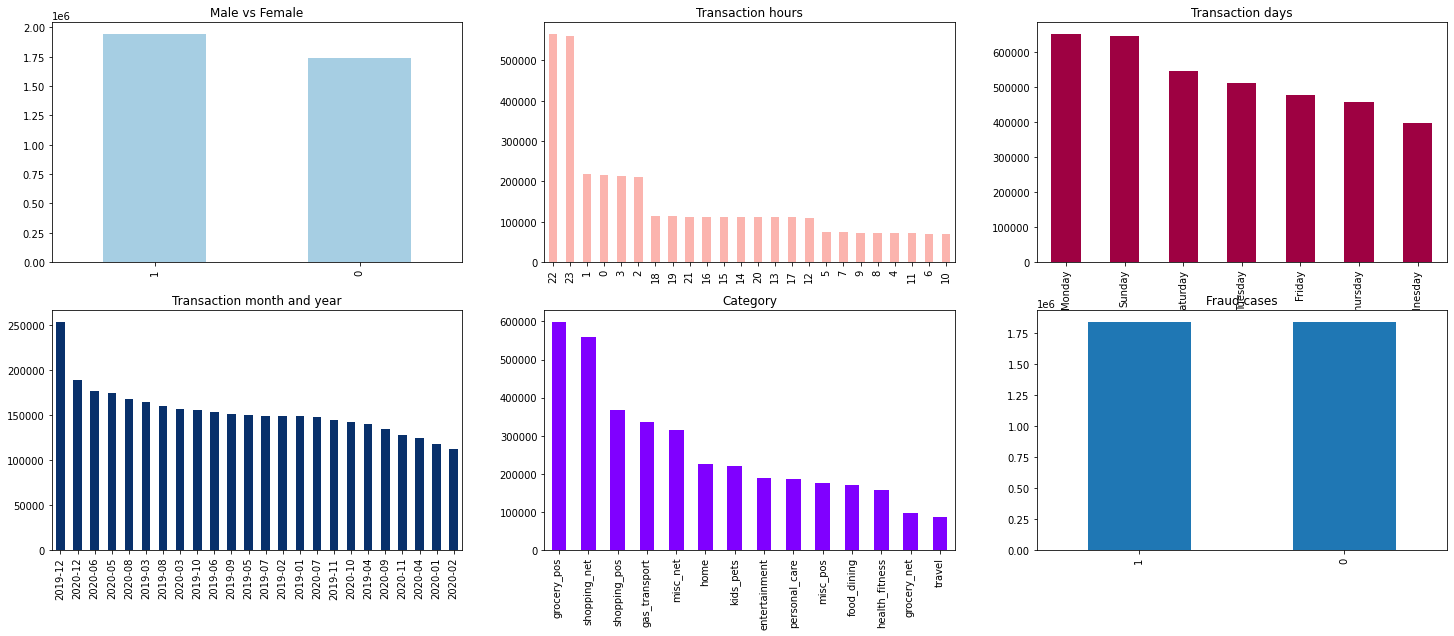

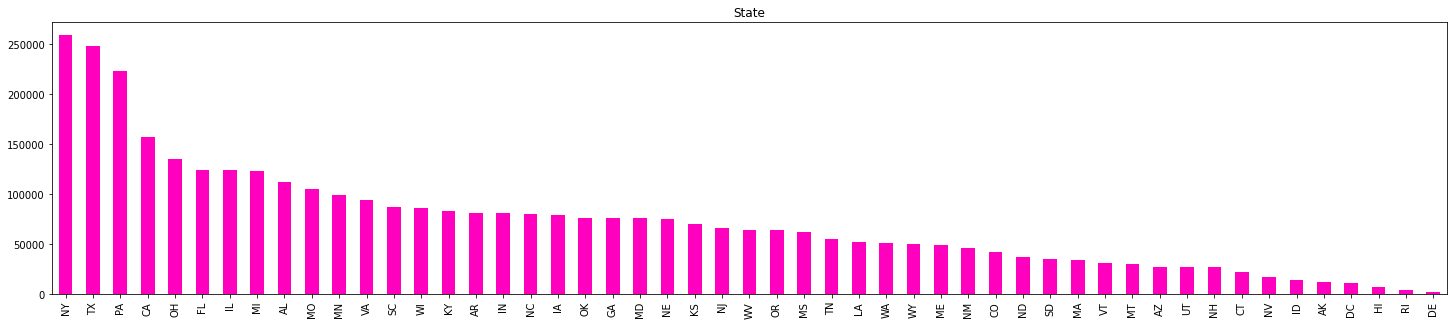

In [ ]:
plt.figure(figsize=(25,15))
plt.subplot(3,3,1)
df_oversampled['gender'].value_counts().plot.bar(colormap='Paired').set_title('Male vs Female');
plt.subplot(3,3,2)
df_oversampled['trans_hour'].value_counts().plot.bar(colormap='Pastel1').set_title('Transaction hours');
plt.subplot(3,3,3)
df_oversampled['day_of_week'].value_counts().plot.bar(colormap='Spectral').set_title('Transaction days');
plt.subplot(3,3,4)
df_oversampled['year_month'].value_counts().plot.bar(colormap='Blues_r').set_title('Transaction month and year');
plt.subplot(3,3,5)
df_oversampled['category'].value_counts().plot.bar(colormap='rainbow').set_title('Category');
plt.subplot(3,3,6)
df_oversampled['is_fraud'].value_counts().plot.bar().set_title('Fraud cases');
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
df_oversampled['state'].value_counts().plot.bar(colormap='gist_rainbow_r').set_title('State');

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_cols = ['cc_num', 'amt', 'gender', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'trans_hour', 'age', 'entertainment', 'food_dining', 'gas_transport',
          'grocery_net', 'grocery_pos', 'health_fitness', 'home', 'kids_pets', 'misc_net', 'misc_pos', 'personal_care', 'shopping_net', 'shopping_pos', 'travel',  'Friday',
          'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'hist_trans_24h', 'hist_fraud_trans_24h', 'hist_trans_2h', 'hist_fraud_trans_2h']
Y_cols = ['is_fraud']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_oversampled[X_cols],df_oversampled[Y_cols] , train_size=0.7, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(2580209, 36)
(1105805, 36)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Logistic Regression using oversampled data

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#training scores
y_train_pred = logreg.predict(X_train)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[1290117       0]
 [1290092       0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67   1290117
           1       0.00      0.00      0.00   1290092

    accuracy                           0.50   2580209
   macro avg       0.25      0.50      0.33   2580209
weighted avg       0.25      0.50      0.33   2580209



In [ ]:
#testing scores
y_test_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[552890      0]
 [552915      0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67    552890
           1       0.00      0.00      0.00    552915

    accuracy                           0.50   1105805
   macro avg       0.25      0.50      0.33   1105805
weighted avg       0.25      0.50      0.33   1105805



Decision Tree Classifier using oversampled data

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, random_state=0)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
#training scores
print("Train Results")
pred_train = dt_clf.predict(X_train)
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

Train Results
[[1290117       0]
 [      0 1290092]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1290117
           1       1.00      1.00      1.00   1290092

    accuracy                           1.00   2580209
   macro avg       1.00      1.00      1.00   2580209
weighted avg       1.00      1.00      1.00   2580209



In [ ]:
#testing scores
print("Test Results")
pred_test = dt_clf.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

Test Results
[[552890      0]
 [     0 552915]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552890
           1       1.00      1.00      1.00    552915

    accuracy                           1.00   1105805
   macro avg       1.00      1.00      1.00   1105805
weighted avg       1.00      1.00      1.00   1105805



Random Forest Classifier using oversampled data

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=345)
param_grid = { 
    'n_estimators': [50],
    'max_depth' : [8,16,20]
}
rf_clf = RandomForestClassifier(n_estimators = 50,max_depth = 20,
                                random_state=345, verbose = 1)
rf_clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.1min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=345,
                       verbose=1, warm_start=False)

In [ ]:
#training scores
print("Train Results")
pred_train = rf_clf.predict(X_train)
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

Train Results


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    8.3s finished


[[1290117       0]
 [      0 1290092]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1290117
           1       1.00      1.00      1.00   1290092

    accuracy                           1.00   2580209
   macro avg       1.00      1.00      1.00   2580209
weighted avg       1.00      1.00      1.00   2580209



In [ ]:
#testing scores
print("Test Results")
pred_test = rf_clf.predict(X_test)
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

Test Results


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.7s finished


[[552890      0]
 [     0 552915]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552890
           1       1.00      1.00      1.00    552915

    accuracy                           1.00   1105805
   macro avg       1.00      1.00      1.00   1105805
weighted avg       1.00      1.00      1.00   1105805



XGBoost using oversampled data 

In [ ]:
import sys
!{sys.executable} -m pip install xgboost

In [ ]:
#Building XG Boost Model
from xgboost import XGBClassifier
# fit model no training data
xbt_model = XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state=345, verbose = 1)
xbt_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=345,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbose=1, verbosity=1)

In [ ]:
#training scores
pred_train = xbt_model.predict(X_train)
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

[[1290117       0]
 [      0 1290092]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1290117
           1       1.00      1.00      1.00   1290092

    accuracy                           1.00   2580209
   macro avg       1.00      1.00      1.00   2580209
weighted avg       1.00      1.00      1.00   2580209



In [ ]:
#testing scores
pred_test = xbt_model.predict(X_test)
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

[[552890      0]
 [     0 552915]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552890
           1       1.00      1.00      1.00    552915

    accuracy                           1.00   1105805
   macro avg       1.00      1.00      1.00   1105805
weighted avg       1.00      1.00      1.00   1105805



Naive bayes classifier for oversampled data

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB_clf=GaussianNB()
NB_clf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
pred_train = NB_clf.predict(X_train) 
pred_train=pred_train.reshape(2580209,1)
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))
#NB_pred,NB_pred_prob=NB_clf.predict(X_test),NB_clf.predict_proba(X_test)

[[ 118254 1171863]
 [ 112218 1177874]]
              precision    recall  f1-score   support

           0       0.51      0.09      0.16   1290117
           1       0.50      0.91      0.65   1290092

    accuracy                           0.50   2580209
   macro avg       0.51      0.50      0.40   2580209
weighted avg       0.51      0.50      0.40   2580209



In [ ]:
pred_test = NB_clf.predict(X_test) 
pred_train=pred_test.reshape(1105805, 1)
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

[[ 50690 502200]
 [ 47858 505057]]
              precision    recall  f1-score   support

           0       0.51      0.09      0.16    552890
           1       0.50      0.91      0.65    552915

    accuracy                           0.50   1105805
   macro avg       0.51      0.50      0.40   1105805
weighted avg       0.51      0.50      0.40   1105805



# Training and testing on Undersampled data

In [ ]:
#undersampling
cnt_fraud = df[df['is_fraud'] == 1]['amt'].count()
cnt_non_fraud = df[df['is_fraud'] == 0]['amt'].count()
df_class_fraud = df[df['is_fraud'] == 1]
df_class_nonfraud = df[df['is_fraud'] == 0]
df_class_nonfraud_undersample = df_class_nonfraud.sample(cnt_fraud)
df_undersampled = pd.concat([df_class_nonfraud_undersample, df_class_fraud], axis=0)
print('Random under-sampling:')
print(df_undersampled['is_fraud'].value_counts())

Random under-sampling:
1    9651
0    9651
Name: is_fraud, dtype: int64


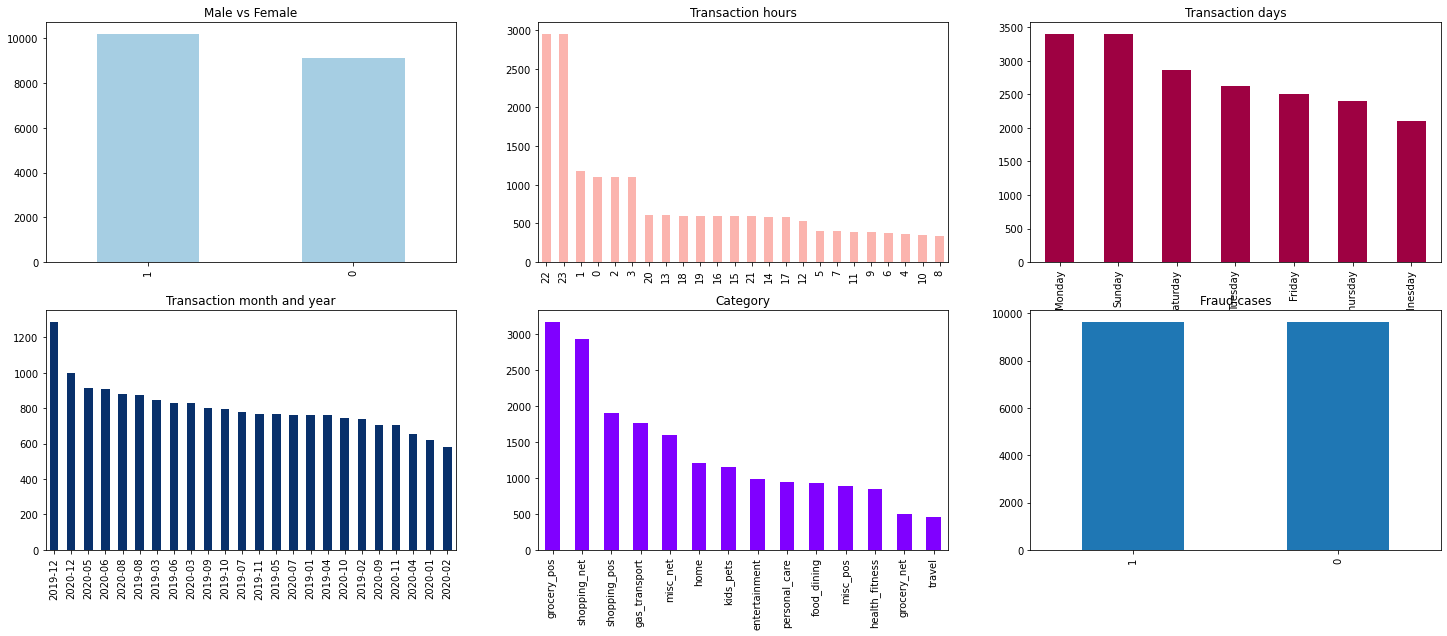

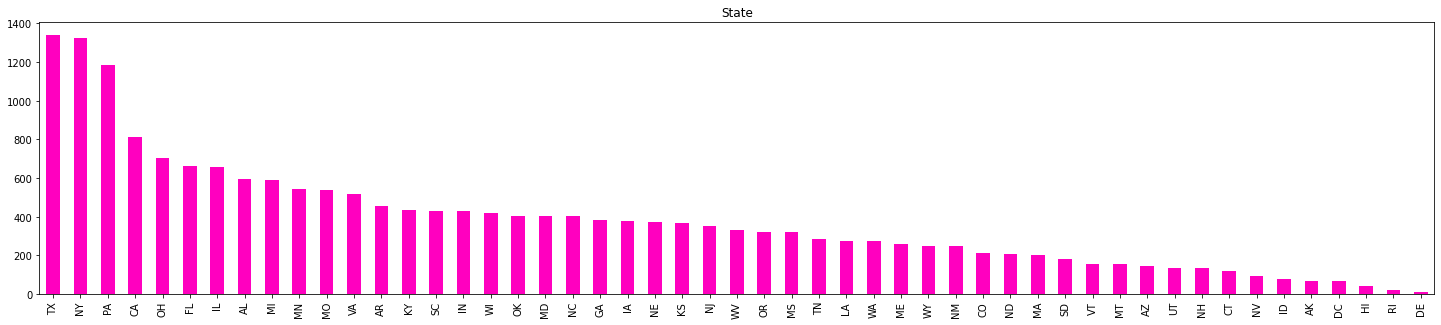

In [ ]:
plt.figure(figsize=(25,15))
plt.subplot(3,3,1)
df_undersampled['gender'].value_counts().plot.bar(colormap='Paired').set_title('Male vs Female');
plt.subplot(3,3,2)
df_undersampled['trans_hour'].value_counts().plot.bar(colormap='Pastel1').set_title('Transaction hours');
plt.subplot(3,3,3)
df_undersampled['day_of_week'].value_counts().plot.bar(colormap='Spectral').set_title('Transaction days');
plt.subplot(3,3,4)
df_undersampled['year_month'].value_counts().plot.bar(colormap='Blues_r').set_title('Transaction month and year');
plt.subplot(3,3,5)
df_undersampled['category'].value_counts().plot.bar(colormap='rainbow').set_title('Category');
plt.subplot(3,3,6)
df_undersampled['is_fraud'].value_counts().plot.bar().set_title('Fraud cases');
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
df_undersampled['state'].value_counts().plot.bar(colormap='gist_rainbow_r').set_title('State');

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_undersampled[X_cols],df_undersampled[Y_cols] , train_size=0.7, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(13511, 36)
(5791, 36)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Logistic Regression using undersampled data

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#training scores
y_train_pred = logreg.predict(X_train)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[   0 6756]
 [   0 6755]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6756
           1       0.50      1.00      0.67      6755

    accuracy                           0.50     13511
   macro avg       0.25      0.50      0.33     13511
weighted avg       0.25      0.50      0.33     13511



In [ ]:
#testing scores
y_test_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[   0 2895]
 [   0 2896]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2895
           1       0.50      1.00      0.67      2896

    accuracy                           0.50      5791
   macro avg       0.25      0.50      0.33      5791
weighted avg       0.25      0.50      0.33      5791



Decision Tree Classifier using undersampled data

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, random_state=0)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
#training scores
print("Train Results")
pred_train = dt_clf.predict(X_train)
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

Train Results
[[6756    0]
 [   0 6755]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6756
           1       1.00      1.00      1.00      6755

    accuracy                           1.00     13511
   macro avg       1.00      1.00      1.00     13511
weighted avg       1.00      1.00      1.00     13511



In [ ]:
#testing scores
print("Test Results")
pred_test = dt_clf.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

Test Results
[[2895    0]
 [   0 2896]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2895
           1       1.00      1.00      1.00      2896

    accuracy                           1.00      5791
   macro avg       1.00      1.00      1.00      5791
weighted avg       1.00      1.00      1.00      5791



Random Forest Classifier using undersampled data

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=345)
param_grid = { 
    'n_estimators': [50],
    'max_depth' : [8,16,20]
}
rf_clf = RandomForestClassifier(n_estimators = 50,max_depth = 20,
                                random_state=345, verbose = 1)
rf_clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=345,
                       verbose=1, warm_start=False)

In [ ]:
#training scores
print("Train Results")
pred_train = rf_clf.predict(X_train)
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

Train Results
[[6756    0]
 [   0 6755]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6756
           1       1.00      1.00      1.00      6755

    accuracy                           1.00     13511
   macro avg       1.00      1.00      1.00     13511
weighted avg       1.00      1.00      1.00     13511



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


In [ ]:
#testing scores
print("Test Results")
pred_test = rf_clf.predict(X_test)
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

Test Results
[[2895    0]
 [   0 2896]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2895
           1       1.00      1.00      1.00      2896

    accuracy                           1.00      5791
   macro avg       1.00      1.00      1.00      5791
weighted avg       1.00      1.00      1.00      5791



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


XGBoost using Undersampled data 

In [ ]:
import sys
!{sys.executable} -m pip install xgboost

In [ ]:
#Building XG Boost Model
from xgboost import XGBClassifier
# fit model no training data
xbt_model = XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state=345, verbose = 1)
xbt_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=345,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbose=1, verbosity=1)

In [ ]:
#training scores
pred_train = xbt_model.predict(X_train)
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

[[6756    0]
 [   1 6754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6756
           1       1.00      1.00      1.00      6755

    accuracy                           1.00     13511
   macro avg       1.00      1.00      1.00     13511
weighted avg       1.00      1.00      1.00     13511



In [ ]:
#testing scores
pred_test = xbt_model.predict(X_test)
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

[[2895    0]
 [   0 2896]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2895
           1       1.00      1.00      1.00      2896

    accuracy                           1.00      5791
   macro avg       1.00      1.00      1.00      5791
weighted avg       1.00      1.00      1.00      5791



KNeighborsClassifier on undersampled data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#Number of neighbors to use by default for kneighbors queries.
knn = KNeighborsClassifier(n_neighbors=5)
#Train the model using the training sets
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#training scores
pred_train = knn.predict(X_train)
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

[[6289  467]
 [1416 5339]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      6756
           1       0.92      0.79      0.85      6755

    accuracy                           0.86     13511
   macro avg       0.87      0.86      0.86     13511
weighted avg       0.87      0.86      0.86     13511



In [ ]:
#testing scores
pred_test = knn.predict(X_test)
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

[[2516  379]
 [ 871 2025]]
              precision    recall  f1-score   support

           0       0.74      0.87      0.80      2895
           1       0.84      0.70      0.76      2896

    accuracy                           0.78      5791
   macro avg       0.79      0.78      0.78      5791
weighted avg       0.79      0.78      0.78      5791



Naive bayes classifier for undersampled data

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB_clf=GaussianNB()
NB_clf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
pred_train = NB_clf.predict(X_train) 
pred_train=pred_train.reshape(13511,1)
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))
#NB_pred,NB_pred_prob=NB_clf.predict(X_test),NB_clf.predict_proba(X_test)

[[ 624 6132]
 [ 608 6147]]
              precision    recall  f1-score   support

           0       0.51      0.09      0.16      6756
           1       0.50      0.91      0.65      6755

    accuracy                           0.50     13511
   macro avg       0.50      0.50      0.40     13511
weighted avg       0.50      0.50      0.40     13511



In [ ]:
pred_test = NB_clf.predict(X_test) 
pred_train=pred_test.reshape(5791, 1)
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

[[ 269 2626]
 [ 237 2659]]
              precision    recall  f1-score   support

           0       0.53      0.09      0.16      2895
           1       0.50      0.92      0.65      2896

    accuracy                           0.51      5791
   macro avg       0.52      0.51      0.40      5791
weighted avg       0.52      0.51      0.40      5791



# Conclusion

| Algorithm used | Imbalanced data | Oversampled data | Undersampled data |
| -------------- | --------------- | ---------------- | :----------------- |
| Logistic Regression | 99% | 50% | 50% |
| Desicion Tree | 100% | 100% | 100% |
| Random Forest | 100% | 100% | 100% |
| XGBoost | 100% | 100% | 100% |
| KNN | 100% | NA | 78% |
| Naive Bayes | 99% | 50% | 51% |

